In [14]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [15]:
image = fits.getdata('./Downloads/480_2018_.Flat.54S0X1.Sky.58.fits').astype(np.int32)
print(image.shape)
print('')
print(image)

(1472, 2184)

[[16080 18408 18806 ..., 10624 10450  9325]
 [18030 20879 21172 ..., 11671 11686 10335]
 [18447 21224 21401 ..., 11852 11869 10578]
 ..., 
 [19189 21807 22093 ..., 10809 10598  9468]
 [18800 21564 21407 ..., 10768 10574  9303]
 [17006 19369 19661 ...,  9518  9345  8589]]


In [16]:
flat1 = fits.getdata('./Downloads/480_2018_.Flat.54S0X1.Sky.58.fits').astype(np.int32)
print(flat1.shape)
print('')
print(flat1)

(1472, 2184)

[[16080 18408 18806 ..., 10624 10450  9325]
 [18030 20879 21172 ..., 11671 11686 10335]
 [18447 21224 21401 ..., 11852 11869 10578]
 ..., 
 [19189 21807 22093 ..., 10809 10598  9468]
 [18800 21564 21407 ..., 10768 10574  9303]
 [17006 19369 19661 ...,  9518  9345  8589]]


In [17]:
flat2 = fits.getdata('./Downloads/480_2018_.Flat.0S0X1.R.35.fits').astype(np.int32)
print(flat2.shape)
print('')
print(flat2)


(1472, 2184)

[[1030 1033 1032 ..., 1025 1015 1010]
 [1038 1013 1040 ..., 1024 1018 1021]
 [1027 1027 1032 ..., 1028 1029 1044]
 ..., 
 [1020 1031 1025 ..., 1013 1012 1028]
 [1027 1045 1022 ..., 1028 1023 1007]
 [1024 1020 1049 ..., 1017 1029 1034]]


In [18]:
bias1 = fits.getdata('./Downloads/480_2018_.Bias(0.0S0X1).71.fits').astype(np.int32)
print(bias1.shape)
print('')
print(bias1)

(1472, 2184)

[[1039 1032 1034 ..., 1015 1008 1014]
 [1026 1032 1040 ..., 1017 1026 1042]
 [1034 1043 1037 ..., 1017 1016 1015]
 ..., 
 [1033 1032 1025 ..., 1030 1023 1046]
 [1025 1045 1042 ..., 1022 1024 1022]
 [1012 1050 1023 ..., 1011 1022 1012]]


In [19]:
bias2 = fits.getdata('./Downloads/480_2018_.Bias(0.0S0X1).70.fits').astype(np.int32)
print(bias2.shape)
print('')
print(bias2)

(1472, 2184)

[[1031 1036 1043 ..., 1022 1018 1025]
 [1041 1042 1031 ..., 1038 1027 1030]
 [1034 1032 1045 ..., 1041 1038 1044]
 ..., 
 [1025 1028 1021 ..., 1027 1034 1023]
 [1021 1030 1044 ..., 1028 1036 1053]
 [1039 1040 1044 ..., 1043 1016 1020]]


In [20]:
mean_f1 = np.mean(flat1)
print(mean_f1)

18446.1133814


In [21]:
mean_f2 = np.mean(flat2)
print(mean_f2)

1021.04913576


In [22]:
mean_b1 = np.mean(bias1)
print(mean_b1)

1025.20868732


In [23]:
mean_b2 = np.mean(bias2)
print(mean_b2)

1026.87664393


In [24]:
sigma_f1f2 = np.std(flat1 - flat2)
print(sigma_f1f2)

sigma_b1b2 = np.std(bias1 - bias2)
print(sigma_f1f2)

gain = (mean_f1 + mean_f2 - mean_b1 - mean_b2)/(sigma_f1f2**2 - sigma_b1b2**2)
print(gain)

4450.53046379
4450.53046379
0.000879235096309


In [25]:
read_noise = (gain * sigma_b1b2)/(np.sqrt(2))

print(read_noise)

0.00747314158798


In [26]:
row0 = 100
row1 = 200
colm0 = 200
colm1 = 300

sub_image = image[row0:row1, colm0:colm1]

print(sub_image.shape)
print('')
print(sub_image)

(100, 100)

[[22118 22405 22067 ..., 22041 22213 22189]
 [22278 22202 22256 ..., 22013 22149 22004]
 [22230 22401 22332 ..., 22214 22328 22111]
 ..., 
 [24318 23855 23796 ..., 24011 23891 23840]
 [24160 23803 24003 ..., 23532 23656 23674]
 [23792 23973 24035 ..., 23715 23779 23627]]


In [27]:
def calculate_gain(flat1, flat2, bias1, bias2):
    """
    Calculate detector gain given two flat frames and two bias frames.
    
    Parameters
    ----------
    flat_1, flat_2 : numpy.array_like
        The flat frames
    bias_1, bias_2 : numpy.array_like
        The bias frames
        
    Returns
    -------
    gain : float
        The detector gain
    """
    # This is Equation 3 from the assignment
    numerator = (np.mean(flat1) + np.mean(flat2)) - (np.mean(bias1) + np.mean(bias2))
    denominator = np.std((flat1 - flat2)) ** 2 - np.std((bias1 - bias2)) ** 2
    gain = numerator / denominator
    
    return gain

In [28]:
row_bins = np.linspace(0, flat1.shape[0], 5).astype(int)
print(row_bins)
col_bins = np.linspace(0, flat1.shape[1], 10).astype(int)
print(col_bins)

[   0  368  736 1104 1472]
[   0  242  485  728  970 1213 1456 1698 1941 2184]


In [29]:
# This is an array to store the gain in each subregion.
gain_map = np.zeros((len(row_bins) - 1, len(col_bins - 1)))

# This nested for loop goes through each subregion.
for ii in range(len(row_bins) - 1):
    for jj in range(len(col_bins) - 1):
        row_slice = slice(row_bins[ii], row_bins[ii + 1])
        col_slice = slice(col_bins[jj], col_bins[jj + 1])
        
        # The `local_gain` is the gain in the subregion
        local_gain = calculate_gain(flat1[row_slice, col_slice], flat2[row_slice, col_slice],
                                    bias1[row_slice, col_slice], bias2[row_slice, col_slice])
        
        # Store the local gain in the `gain_map`
        gain_map[ii, jj] = local_gain

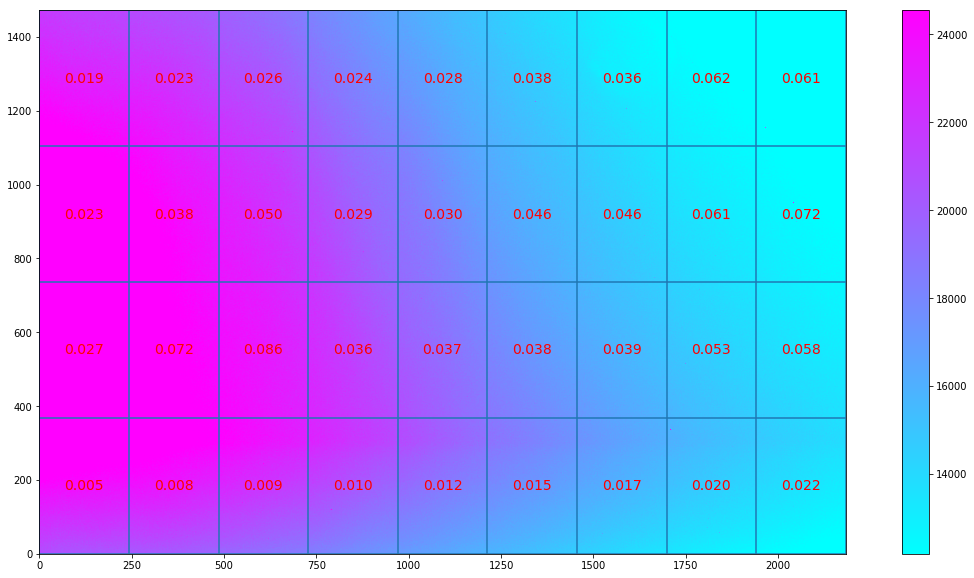

In [31]:
plt.figure(figsize=(20, 10))

# Use the imshow function to plot one of the flat images for reference.
plt.imshow(flat1, vmin=np.percentile(flat1, 5), vmax=np.percentile(flat1, 90),
           origin='lower', cmap='cool', interpolation='nearest')


# Plot the boundaries of the subregions
for row in row_bins:
    plt.axhline(row)
for col in col_bins:
    plt.axvline(col)

# Print the local gain value in each subregion
for ii in range(len(row_bins) - 1):
    for jj in range(len(col_bins) - 1):
        row_loc = (row_bins[ii] + row_bins[ii + 1]) / 2
        col_loc = (col_bins[jj] + col_bins[jj + 1]) / 2
        
        plt.text(col_loc, row_loc, '{:.3f}'.format(gain_map[ii, jj]),
                 ha='center', va='center', fontsize=14, color='r')

plt.xlim(0, col_bins[-1])
plt.ylim(0, row_bins[-1])

# Add a colorbar
plt.colorbar()
plt.show()